### Model Training/Testing

## Feature Selection

In [ ]:
# feature importance through correlation
correlation_matrix = df2.corr()
label_correlation = correlation_matrix['label'].abs().sort_values(ascending=False)
print("Absolute Correlation with 'label':")
display(label_correlation)

Absolute Correlation with 'label':


,label
label,1.000000
attack_cat,0.638825
sttl,0.504159
state,0.459040
swin,0.414504
ct_dst_sport_ltm,0.393668
dwin,0.369257
ct_src_dport_ltm,0.341513
rate,0.328629
ct_state_ttl,0.318517


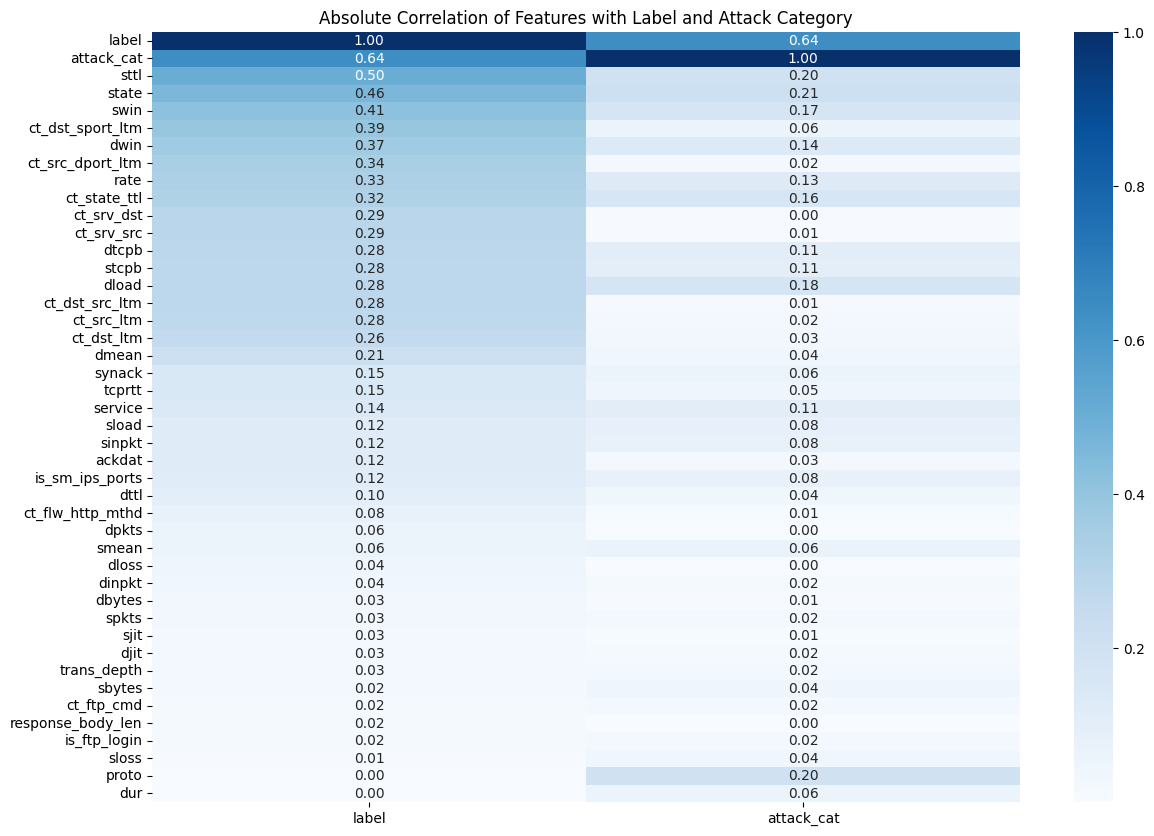

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix[['label', 'attack_cat']].abs().sort_values(by='label', ascending=False), annot=True, cmap='Blues', fmt=".2f")
plt.title('Absolute Correlation of Features with Label and Attack Category')
plt.show()

In [ ]:
# Choose a correlation threshold
correlation_threshold = 0.1

# Select features based on the threshold, excluding the label itself
selected_features = label_correlation[label_correlation > correlation_threshold].index.tolist()
if 'label' in selected_features:
    selected_features.remove('label')

if 'attack_cat' in selected_features:
    selected_features.remove('attack_cat')

print(f"Features with absolute correlation > {correlation_threshold} with 'label':")
print(selected_features)

Features with absolute correlation > 0.1 with 'label':
['sttl', 'state', 'swin', 'ct_dst_sport_ltm', 'dwin', 'ct_src_dport_ltm', 'rate', 'ct_state_ttl', 'ct_srv_dst', 'ct_srv_src', 'dtcpb', 'stcpb', 'dload', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_dst_ltm', 'dmean', 'synack', 'tcprtt', 'service', 'sload', 'sinpkt', 'ackdat', 'is_sm_ips_ports']


In [ ]:
# split test/train/val for new df with selected features
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_val_selected:", X_val_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)

Shape of X_train_selected: (49398, 24)
Shape of X_val_selected: (16467, 24)
Shape of X_test_selected: (16467, 24)


In [ ]:
# Retrain on Logistic regression

model_lr_selected = LogisticRegression(random_state=42, max_iter=1000)
model_lr_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained Logistic Regression model
y_pred_test_lr_selected = model_lr_selected.predict(X_test_selected)

# Evaluate the model
lr_selected_metrics = evaluate_model_performance(y_test, y_pred_test_lr_selected, model_name="Logistic Regression Model with Selected Features")

Logistic Regression Model with Selected Features Performance:
Accuracy: 0.8758
Precision: 0.9043
Recall: 0.8660
F1-score: 0.8847
ROC AUC Score: 0.8769
Confusion Matrix:


array([[6569,  831],
       [1215, 7852]])


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      7400
           1       0.90      0.87      0.88      9067

    accuracy                           0.88     16467
   macro avg       0.87      0.88      0.87     16467
weighted avg       0.88      0.88      0.88     16467



In [ ]:
# Retrain xgboost with selected features
xgb_model_selected = XGBClassifier(random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained XGBoost model
y_pred_test_xgb_selected = xgb_model_selected.predict(X_test_selected)

# Evaluate the model
xgb_selected_metrics = evaluate_model_performance(y_test, y_pred_test_xgb_selected, model_name="XGBoost Model with Selected Features")

XGBoost Model with Selected Features Performance:
Accuracy: 0.9681
Precision: 0.9722
Recall: 0.9697
F1-score: 0.9710
ROC AUC Score: 0.9679
Confusion Matrix:


array([[7149,  251],
       [ 275, 8792]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7400
           1       0.97      0.97      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467



In [ ]:
# Retrain Random Forest with selected features
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set using the retrained Random Forest model
y_pred_test_rf_selected = rf_model_selected.predict(X_test_selected)

# Evaluate the model
rf_selected_metrics = evaluate_model_performance(y_test, y_pred_test_rf_selected, model_name="Random Forest Model with Selected Features")

Random Forest Model with Selected Features Performance:
Accuracy: 0.9675
Precision: 0.9702
Recall: 0.9708
F1-score: 0.9705
ROC AUC Score: 0.9671
Confusion Matrix:


array([[7130,  270],
       [ 265, 8802]])


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7400
           1       0.97      0.97      0.97      9067

    accuracy                           0.97     16467
   macro avg       0.97      0.97      0.97     16467
weighted avg       0.97      0.97      0.97     16467



Analysis -------------------------------

*   Comparing the models with and without feature selection, all models (Logistic Regression, XGBoost, and Random Forest) showed a decrease in Accuracy, Precision, Recall, F1-score, and ROC AUC when trained on the selected features compared to training on all features.

*   Feature selection, in this case, did not improve model performance and resulted in a decrease across all evaluated metrics for all models.
*   Despite the performance decrease with selected features, XGBoost and Random Forest still outperform Logistic Regression, suggesting that tree-based models are more suitable for this dataset.


## Feature Engineering

In [ ]:
# Create 2 new features: packet and byte ratios
df2['pkt_ratio'] = df2['dpkts'] / (df2['spkts'] + df2['dpkts'] + 1e-6)
df2['byte_ratio'] = df2['dbytes'] / (df2['sbytes'] + df2['dbytes'] + 1e-6)

print("DataFrame with new features:")
display(df2[['spkts', 'dpkts', 'pkt_ratio', 'sbytes', 'dbytes', 'byte_ratio']].head())

DataFrame with new features:


,spkts,dpkts,pkt_ratio,sbytes,dbytes,byte_ratio
0,0.000094,0.0,0.0,0.000033,0.0,0.0
1,0.000094,0.0,0.0,0.000121,0.0,0.0
2,0.000094,0.0,0.0,0.000073,0.0,0.0
3,0.000094,0.0,0.0,0.000061,0.0,0.0
4,0.000094,0.0,0.0,0.000146,0.0,0.0


In [ ]:
df2.shape

(82332, 46)

In [ ]:
# Split into train, validation, and test sets with engineered features
X_engineered = df2.drop(columns=['label', 'attack_cat']) # Also drop attack_cat not needed for binary classification
y_engineered = df2['label']

X_trainval_engineered, X_test_engineered, y_trainval_engineered, y_test_engineered = train_test_split(X_engineered, y_engineered, test_size=0.2, stratify=y_engineered, random_state=42)
X_train_engineered, X_val_engineered, y_train_engineered, y_val_engineered = train_test_split(X_trainval_engineered, y_trainval_engineered, test_size=0.25, stratify=y_trainval_engineered, random_state=42)

In [ ]:
# Initialize and retrain the Logistic Regression model with engineered features
model_lr_engineered = LogisticRegression(random_state=42, max_iter=1000)
model_lr_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions on the test set
y_pred_test_lr_engineered = model_lr_engineered.predict(X_test_engineered)

# Evaluate the model
lr_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_lr_engineered, model_name="Logistic Regression Model with Engineered Features")

Logistic Regression Model with Engineered Features Performance:
Accuracy: 0.8889
Precision: 0.8893
Recall: 0.9117
F1-score: 0.9003
ROC AUC Score: 0.8863
Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[6371, 1029],
       [ 801, 8266]])


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      7400
           1       0.89      0.91      0.90      9067

    accuracy                           0.89     16467
   macro avg       0.89      0.89      0.89     16467
weighted avg       0.89      0.89      0.89     16467



In [ ]:
# Retrain xgboost model with engineered features
xgb_model_engineered = XGBClassifier(random_state=42)
xgb_model_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions using the retrained XGBoost model
y_pred_test_xgb_engineered = xgb_model_engineered.predict(X_test_engineered)

# Evaluate the model
xgb_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_xgb_engineered, model_name="XGBoost Model with Engineered Features")

XGBoost Model with Engineered Features Performance:
Accuracy: 0.9784
Precision: 0.9861
Recall: 0.9745
F1-score: 0.9803
ROC AUC Score: 0.9788
Confusion Matrix:


array([[7275,  125],
       [ 231, 8836]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7400
           1       0.99      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.98      0.98      0.98     16467
weighted avg       0.98      0.98      0.98     16467



In [ ]:
# Retrain Random Forest model with engineered features
rf_model_engineered = RandomForestClassifier(random_state=42)
rf_model_engineered.fit(X_train_engineered, y_train_engineered)

# Make predictions using the retrained Random Forest model
y_pred_test_rf_engineered = rf_model_engineered.predict(X_test_engineered)

# Evaluate the model
rf_engineered_metrics = evaluate_model_performance(y_test_engineered, y_pred_test_rf_engineered, model_name="Random Forest Model with Engineered Features")

Random Forest Model with Engineered Features Performance:
Accuracy: 0.9752
Precision: 0.9834
Recall: 0.9713
F1-score: 0.9773
ROC AUC Score: 0.9756
Confusion Matrix:


array([[7251,  149],
       [ 260, 8807]])


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7400
           1       0.98      0.97      0.98      9067

    accuracy                           0.98     16467
   macro avg       0.97      0.98      0.97     16467
weighted avg       0.98      0.98      0.98     16467



Analysis -------------------------------
*   Comparing the models with and without feature engineering, all models (Logistic Regression, XGBoost, and Random Forest) showed a increase in atleast one metric when trained with additional features compared to the baseline models.

*   Feature engineering, in this case, did improve model performance on some more than others for some of the metrics.
*   XGBoost and Random Forest still outperformed Logistic Regression.